In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Reshape and normalize the images
train_x = train_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_x = test_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
model.fit(train_x, train_y, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8109 - loss: 0.5340 - val_accuracy: 0.8919 - val_loss: 0.3032
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9011 - loss: 0.2738 - val_accuracy: 0.9042 - val_loss: 0.2659
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9176 - loss: 0.2193 - val_accuracy: 0.9093 - val_loss: 0.2497
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9342 - loss: 0.1765 - val_accuracy: 0.9062 - val_loss: 0.2597
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9447 - loss: 0.1499 - val_accuracy: 0.9108 - val_loss: 0.2560


In [7]:
# Evaluate the model
loss, acc = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9039 - loss: 0.2729
Test Accuracy: 0.9091


In [8]:
# Define label names
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
# Make a prediction on a single test image
sample = test_x[:1]
prediction = model.predict(sample)
predicted_label = labels[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Predicted Label: Ankle boot


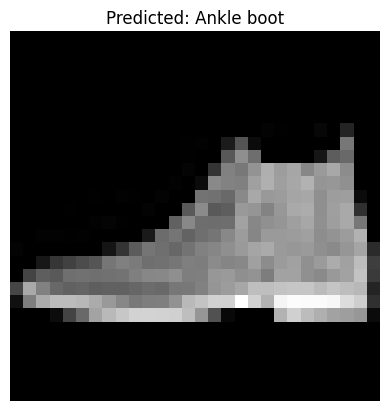

In [10]:
# Show prediction and image
print("Predicted Label:", predicted_label)
plt.imshow(sample[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()